# Tutorial 2: Coordinate Reference Systems
The maps we create portray the surface of the earth in 2D. But since the earth is 3D we use a method called **map projection**. THough map projections can not be 100% accurate, they do retain some usefull properties.

For example:
- The **equal-area** projections (like "**Lambert Cylindrical Equal Area**", or "**Africa Albers Equal Area Conic**") preserve area.
- The **equidistant** projections (like "**Azimuthal Equidistant projection**") preserve distance.

We use a **coordinate reference system (CRS)** to show how the projected points correspond to real locations on Earth. In this tutorial, we'll learn more about CRS, along with how to use them in GeoPandas.

In [1]:
import geopandas as gpd
import pandas as pd

## Setting the CRS
When we create a GeoDataFrame from a shapefile, the CRS is already imported for us.

In [3]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("./data/Ghana/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


**CRS** are referenced by **European Petroleum Survey Group (EPSG)** codes.

This GeoDataFrame uses **EPSG 32630**, which is more commonly called the "Mercator" projection. This projection preserves angles (making it useful for sea navigation) and slightly distorts area.

However, when creating a GeoDataFrame from a **CSV file**, we have to set the CRS. **EPSG 4326** corresponds to coordinates in latitude and longitude.

In [9]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv('./data/Ghana/health_facilities.csv')

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

/usr/local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


## Re-projecting
Re-projecting refers to the process of changing the **CRS**. This is done in GeoPandas with the `to_crs()` method.

When plotting multiple GeoDataFrames, it's important that they all use the same **CRS**. In the code cell below, we change the CRS of the facilities GeoDataFrame to match the CRS of regions before plotting it.

<AxesSubplot: >

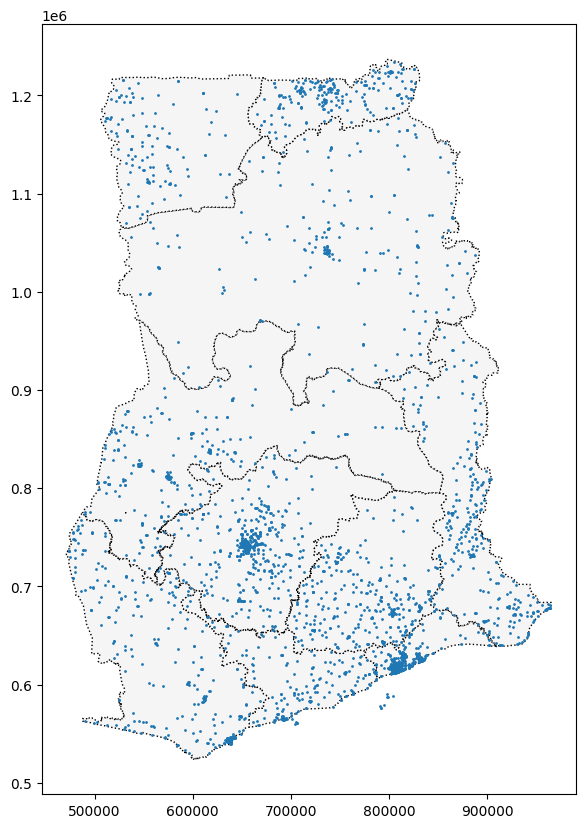

In [11]:
# Create a map
ax = regions.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

The `to_crs()` method modifies only the "geometry" column: all other columns are left as-is.

In [12]:
# The "Latitude" and "Longitude" columns are unchanged
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the **"proj4 string"** of the CRS. For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:

```
+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
```

In [13]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


## Attributes of geometric objects
As you learned in the [first tutorial](./01-Your-First-Map.ipynb), for an arbitrary GeoDataFrame, the type in the "geometry" column depends on what we are trying to show: for instance, we might use:

- a Point for the epicenter of an earthquake,
- a LineString for a street, or
- a Polygon to show country boundaries.

All three types of geometric objects have built-in attributes that you can use to quickly analyze the dataset. For instance, you can get the x- and y-coordinates of a Point from the `x` and `y` attributes, respectively.

In [17]:
# Get the x-coordinate of each point
facilities.geometry.head().y

0    7.40801
1    6.46312
2    6.22393
3    6.84177
4    6.84177
dtype: float64

And, you can get the length of a **LineString** from the `length` attribute.

Or, you can get the area of a **Polygon** from the `area` attribute.

In [18]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


In the code cell above, since the CRS of the regions GeoDataFrame is set to EPSG 32630 (a "Mercator" projection), the area calculation is slightly less accurate than if we had used an equal-area projection like "Africa Albers Equal Area Conic".

But this yields the area of Ghana as approximately 239585 square kilometers, which is not too far off from the correct answer.

# Exercise Solutions
## 1. Load the data.
```{python}
# Your code here: Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, geometry = gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))

# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init': 'epsg:4326'}
```
## 2. Plot the data.
```{python}
# Your code here
ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10)
```
## 3. Where does each bird start and end its journey? (Part 1)
```{python}
# Your code here
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}
```
## 4. Where does each bird start and end its journey? (Part 2)
```{python}
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)
```
## 5. Where are the protected areas in South America? (Part 1)
```{python}
protected_areas = gpd.read_file(protected_filepath)
```
## 6. Where are the protected areas in South America? (Part 2)
```{python}
# Plot protected areas in South America
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas.plot(ax=ax, alpha=0.4)
```
## 7. What percentage of South America is protected?
```{python}
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6
```
## 8. Where are the birds in South America?
```{python}
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)
```